# Employee Attrition Analysis

## Problem Statement
* XYZ company which was established a few years back is facing around a 15% attrition rate for a couple of years. And it's majorly affecting the company in many aspects. In order to understand why employees are leaving the company and reduce the attrition rate XYZ company has approached an HR analytics consultancy for analyzing the data they have. You are playing the HR analyst role in this project and building a dashboard which can help the organization in making data-driven decisions.

In [1]:
## importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## reading the dataset
df = pd.read_csv('Attrition data.csv')
pd.set_option('display.max_columns', None)
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1,Y,11,0,1,6,1,0,0,3,4,2,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0,Y,23,1,6,3,5,1,4,3,2,4,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1,Y,15,3,5,2,5,0,3,2,2,1,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3,Y,11,3,13,5,8,7,5,4,4,3,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4,Y,12,2,9,2,6,0,4,4,1,3,3,3


In [3]:
df.shape

(4390, 27)

We have 4410 rows and total of 29 columns of data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4390 entries, 0 to 4389
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               4390 non-null   int64 
 1   Age                      4390 non-null   int64 
 2   Attrition                4390 non-null   object
 3   BusinessTravel           4390 non-null   object
 4   Department               4390 non-null   object
 5   DistanceFromHome         4390 non-null   int64 
 6   Education                4390 non-null   int64 
 7   EducationField           4390 non-null   object
 8   Gender                   4390 non-null   object
 9   JobLevel                 4390 non-null   int64 
 10  JobRole                  4390 non-null   object
 11  MaritalStatus            4390 non-null   object
 12  MonthlyIncome            4390 non-null   int64 
 13  NumCompaniesWorked       4390 non-null   int64 
 14  Over18                   4390 non-null  

In [5]:
## checking for null values
df.isna().sum()

EmployeeID                 0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64

In [6]:
## checking for duplicate values
df.duplicated().sum()

0

We have no duplicate values. So, now we have clean data with no duplicates.

In [7]:
## let's see the uniqueness of data by finding number of unique values in all columns
df.nunique()

EmployeeID                 4390
Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
Over18                        1
PercentSalaryHike            15
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
EnvironmentSatisfaction       5
JobSatisfaction               4
WorkLifeBalance               5
JobInvolvement                4
PerformanceRating             2
dtype: int64

**We will drop the columns having only one unique value.**

In [8]:
df.drop(columns=['Over18'],inplace=True)
df.nunique()

EmployeeID                 4390
Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
PercentSalaryHike            15
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
EnvironmentSatisfaction       5
JobSatisfaction               4
WorkLifeBalance               5
JobInvolvement                4
PerformanceRating             2
dtype: int64

### Transforming the values of some numerical columns for easy understandings.

In [9]:
## Age
bins = [18, 25, 35, 45, 55, 65]  # You can adjust the bin edges as needed
labels = ['18-24', '25-34', '35-44', '45-54', '55+']
df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df['Age'].value_counts()

Age
25-34    1654
35-44    1506
45-54     733
18-24     291
55+       206
Name: count, dtype: int64

In [10]:
# Distance from home
df['DistanceFromHome'] = pd.cut(df['DistanceFromHome'], bins=[-1, 5, 15, float('inf')],
                             labels=['Near', 'Far', 'Very Far'], right=False)
df['DistanceFromHome'].value_counts()

DistanceFromHome
Near        1693
Far         1636
Very Far    1061
Name: count, dtype: int64

In [11]:
# MonthlyIncome
bins_income = [10090, 50000, 100000, 150000, float('inf')]  # Add 'float('inf')' to include values greater than 150,000
labels_income = ['10,090-49,999', '50,000-99,999', '100,000-149,999', '150,000+']

df['MonthlyIncome'] = pd.cut(df['MonthlyIncome'], bins=bins_income, labels=labels_income, right=False)

df['MonthlyIncome'].value_counts()

MonthlyIncome
10,090-49,999      2235
50,000-99,999      1313
100,000-149,999     444
150,000+            398
Name: count, dtype: int64

In [12]:
# Total Working Years
bins_years = [0, 6, 11, 16, 21, 26, float('inf')]  # Add 'float('inf')' to include values greater than 26
labels_years = ['0-5', '6-10', '11-15', '16-20', '21-25', '25+']

df['TotalWorkingYears'] = pd.cut(df['TotalWorkingYears'], bins=bins_years, labels=labels_years, right=False)

df['TotalWorkingYears'].value_counts()

TotalWorkingYears
6-10     1808
0-5       951
11-15     571
16-20     446
21-25     322
25+       292
Name: count, dtype: int64

In [13]:
# NumCompaniesWorked
bins_comp_num = [0,4,float('inf')]  # Add 'float('inf')' to include values greater than 26
labels_comp_num = ['0-4','5+']

df['NumCompaniesWorked'] = pd.cut(df['NumCompaniesWorked'], bins=bins_comp_num, labels=labels_comp_num, right=False)

df['NumCompaniesWorked'].value_counts()

NumCompaniesWorked
0-4    3064
5+     1326
Name: count, dtype: int64

In [14]:
# Years At Company
bins_years_comp = [0, 6, 11, 16, 21, 26, 31, float('inf')]  # Add 'float('inf')' to include values greater than 31
labels_years_comp = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31+']

df['YearsAtCompany'] = pd.cut(df['YearsAtCompany'], bins=bins_years_comp, labels=labels_years_comp, right=False)

df['YearsAtCompany'].value_counts()

YearsAtCompany
0-5      2318
6-10     1338
11-15     323
16-20     214
21-25     122
31+        48
26-30      27
Name: count, dtype: int64

In [15]:
## Job Satisfaction
df['JobSatisfaction'] = df['JobSatisfaction'].map({1:'Dissatisfied',2:'Dissatisfied',3:'Satisfied',4:'Satisfied'})
df['JobSatisfaction'].value_counts()

JobSatisfaction
Satisfied       2690
Dissatisfied    1700
Name: count, dtype: int64

In [16]:
## WorkLifeBalance
group_mapping = {0: 'Worst', 1: 'Worst', 2: 'Good', 3: 'Better', 4: 'Best'}

df['WorkLifeBalance'] = df['WorkLifeBalance'].map(group_mapping)
df['WorkLifeBalance'].value_counts()

WorkLifeBalance
Better    2646
Good      1016
Best       452
Worst      276
Name: count, dtype: int64

In [17]:
## Environment Satisfaction
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].map(
    {0:'Dissatisfied',1:'Dissatisfied',2:'Dissatisfied',3:'Satisfied',4:'Satisfied'}
)
df['EnvironmentSatisfaction'].value_counts()

EnvironmentSatisfaction
Satisfied       2671
Dissatisfied    1719
Name: count, dtype: int64

In [18]:
## checking for unique values after transforming
df.nunique()

EmployeeID                 4390
Age                           5
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome              3
Education                     5
EducationField                6
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
MonthlyIncome                 4
NumCompaniesWorked            2
PercentSalaryHike            15
StockOptionLevel              4
TotalWorkingYears             6
TrainingTimesLastYear         7
YearsAtCompany                7
YearsSinceLastPromotion      16
YearsWithCurrManager         18
EnvironmentSatisfaction       2
JobSatisfaction               2
WorkLifeBalance               4
JobInvolvement                4
PerformanceRating             2
dtype: int64

In [19]:
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,45-54,No,Travel_Rarely,Sales,Far,2,Life Sciences,Female,1,Healthcare Representative,Married,"100,000-149,999",0-4,11,0,0-5,6,0-5,0,0,Satisfied,Satisfied,Good,3,3
1,2,25-34,Yes,Travel_Frequently,Research & Development,Far,1,Life Sciences,Female,1,Research Scientist,Single,"10,090-49,999",0-4,23,1,6-10,3,0-5,1,4,Satisfied,Dissatisfied,Best,2,4
2,3,25-34,No,Travel_Frequently,Research & Development,Very Far,4,Other,Male,4,Sales Executive,Married,"150,000+",0-4,15,3,0-5,2,0-5,0,3,Dissatisfied,Dissatisfied,Worst,3,3
3,4,35-44,No,Non-Travel,Research & Development,Near,5,Life Sciences,Male,3,Human Resources,Married,"50,000-99,999",0-4,11,3,11-15,5,6-10,7,5,Satisfied,Satisfied,Better,2,3
4,5,25-34,No,Travel_Rarely,Research & Development,Far,1,Medical,Male,1,Sales Executive,Single,"10,090-49,999",5+,12,2,6-10,2,6-10,0,4,Satisfied,Dissatisfied,Better,3,3


In [20]:
## let's find how many employee has attrition as Yes and No
df['Attrition'].value_counts()

Attrition
No     3680
Yes     710
Name: count, dtype: int64

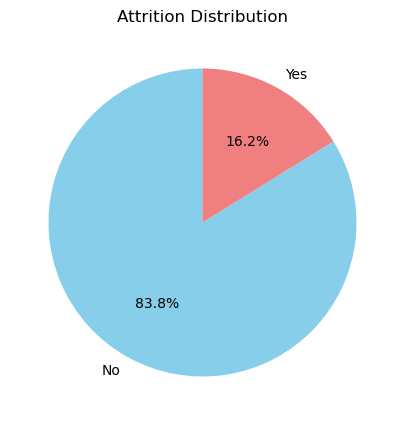

In [21]:
## visualise the above data for better understandings
attrition_percentage = df['Attrition'].value_counts(normalize=True) * 100

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(attrition_percentage, labels=attrition_percentage.index,
        autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Attrition Distribution')
plt.show()

In [22]:
## finding which department has highest number of Attrition
dept_attr = pd.crosstab(df.Department,df.Attrition)
dept_attr

Attrition,No,Yes
Department,,
Human Resources,132,57
Research & Development,2415,453
Sales,1133,200


In [23]:
## finding the attrition rate for all the departments
total_attrition_yes = df['Attrition'].eq('Yes').sum()

# Create a DataFrame with the count of 'Yes' values in 'Attrition' for each department
attrition_by_department = df[df['Attrition'] == 'Yes'].groupby('Department').size().reset_index(name='Attrition_Yes_Count')

# Merge the original DataFrame with the new DataFrame to get the total count of employees in each department
attrition_by_department = pd.merge(df.groupby('Department').size().reset_index(name='Total_Employees'), attrition_by_department, on='Department', how='left')

# Calculate the percentage of 'Yes' values for each department
attrition_by_department['Attrition_Rate'] = (attrition_by_department['Attrition_Yes_Count'] / attrition_by_department['Total_Employees']) * 100

# Display the result
attrition_by_department[['Department', 'Attrition_Rate']]


,Department,Attrition_Rate
0,Human Resources,30.158730
1,Research & Development,15.794979
2,Sales,15.003751


### Observations:
* HR department has the highest Attrition rate among all the departments.
* Although the highest number of Attritions has been seen in `R&D` department.

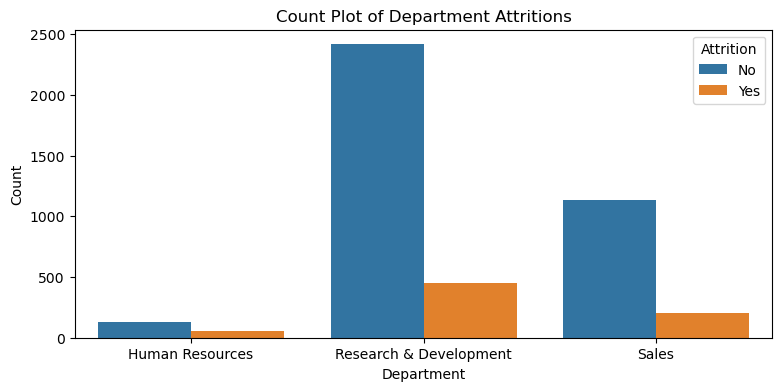

In [24]:
## visualinsation for the above
grouped_data = df.groupby(['Department', 'Attrition']).size().reset_index(name='Count')

# Plotting the count plot
plt.figure(figsize=(9, 4))
sns.barplot(x='Department', y='Count', hue='Attrition', data=grouped_data)
plt.title('Count Plot of Department Attritions')
plt.show()


In [25]:
## Business travel values
df['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        3115
Travel_Frequently     827
Non-Travel            448
Name: count, dtype: int64

**Most of the employees `Travel_Rarely` followed by employees who `Travel_Frequently` and least number of employees are `Non-Travel`.**

In [26]:
## Let's see how many employees travel in each department
dept_travel = pd.crosstab(df.Department,df.BusinessTravel)
dept_travel

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Department,,,
Human Resources,9,24,156
Research & Development,328,516,2024
Sales,111,287,935


## Observations:
* HR Department employess prefer to Business Travel less compared to other departments.
* And the most Business Travel Department is `Research & Development`.
* Also the most `Non-Travellers` are in `Research & Development` department. This is because the most number of employees are working in the **R&D** department.

In [27]:
## Male and Female distribution in departments
dept_gender = pd.crosstab(df['Department'],df['Gender'])
dept_gender

Gender,Female,Male
Department,,
Human Resources,72,117
Research & Development,1157,1711
Sales,528,805


In [28]:
# Calculating the Attrition rate in each department for male and female
attrition_count = df.groupby(['Department', 'Gender'])['Attrition'].value_counts().unstack()

# Calculate the percentage of attrition as 'Yes' for each gender within each department
attrition_percentage = (attrition_count['Yes'] / attrition_count.sum(axis=1)) * 100

# Combine count and percentage into a DataFrame
attrition_summary = pd.DataFrame({'Attrition Percentage': attrition_percentage})

attrition_summary

Attrition Percentage
Department             Gender                      
Human Resources        Female             29.166667
                       Male               30.769231
Research & Development Female             15.816768
                       Male               15.780245
Sales                  Female             12.500000
                       Male               16.645963

In [29]:
df.shape

(4390, 26)

In [30]:
## creating pivot table and other charts easily.
from pivottablejs import pivot_ui
pivot_ui(df)

In [31]:
## let's see the number of employees in different education field by departments
education_field_depart = pd.crosstab(df['Department'], df['EducationField'])
education_field_depart

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Department,,,,,,
Human Resources,81,48,0,39,9,12
Research & Development,0,1311,0,1086,190,281
Sales,0,446,477,263,45,102


## Observations:
* There are no employees in Marketing in deaprtments **`HR`** and **`R&D`**, as the field suggests that they should be in Sales only.
* Same for the Human Resources field also.

In [32]:
## Attritions in Education field
attr_edu = pd.crosstab(df['Attrition'], df['EducationField'])
attr_edu

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Attrition,,,,,,
No,48,1503,402,1163,214,350
Yes,33,302,75,225,30,45


In [33]:
# Calculating the Attrition rate in Education Field
edu_attrition_count = df.groupby('EducationField')['Attrition'].value_counts().unstack()

# Calculate the percentage of attrition as 'Yes' 
edu_attrition_percentage = (edu_attrition_count['Yes'] / edu_attrition_count.sum(axis=1)) * 100

# Combine count and percentage into a DataFrame
edu_attrition_summary = pd.DataFrame({'Attrition Percentage': edu_attrition_percentage})

edu_attrition_summary

,Attrition Percentage
EducationField,
Human Resources,40.740741
Life Sciences,16.731302
Marketing,15.723270
Medical,16.210375
Other,12.295082
Technical Degree,11.392405


## Observations:
* Most attritions are from `Life Sciences` field followed by `Medical` field, but the highest percentage of Attrition `EducationFiled` wise is from Human Resource.
* Least are from `Technical Degree`.

In [34]:
## Attritions by Distance from Home
attr_dist = pd.crosstab(df['Attrition'], df['DistanceFromHome'])
attr_dist

DistanceFromHome,Near,Far,Very Far
Attrition,,,
No,1420,1379,881
Yes,273,257,180


In [35]:
## Total number of Employees in each Job Role
Job_role_crosstab = pd.crosstab(df['JobRole'], df['Attrition'])
Job_role_crosstab

Attrition,No,Yes
JobRole,,
Healthcare Representative,333,57
Human Resources,134,21
Laboratory Technician,649,126
Manager,264,41
Manufacturing Director,383,48
Research Director,182,57
Research Scientist,714,159
Sales Executive,809,165
Sales Representative,212,36


In [36]:
# Calculating the Attrition rate in different Job Roles
jobrole_attrition_count = df.groupby('JobRole')['Attrition'].value_counts().unstack()

# Calculate the percentage of attrition as 'Yes' 
jobrole_attrition_percentage = (jobrole_attrition_count['Yes'] / jobrole_attrition_count.sum(axis=1)) * 100

# Combine count and percentage into a DataFrame
jobrole_attrition_summary = pd.DataFrame({'Attrition Percentage': jobrole_attrition_percentage})

jobrole_attrition_summary

,Attrition Percentage
JobRole,
Healthcare Representative,14.615385
Human Resources,13.548387
Laboratory Technician,16.258065
Manager,13.442623
Manufacturing Director,11.136891
Research Director,23.849372
Research Scientist,18.213058
Sales Executive,16.940452
Sales Representative,14.516129


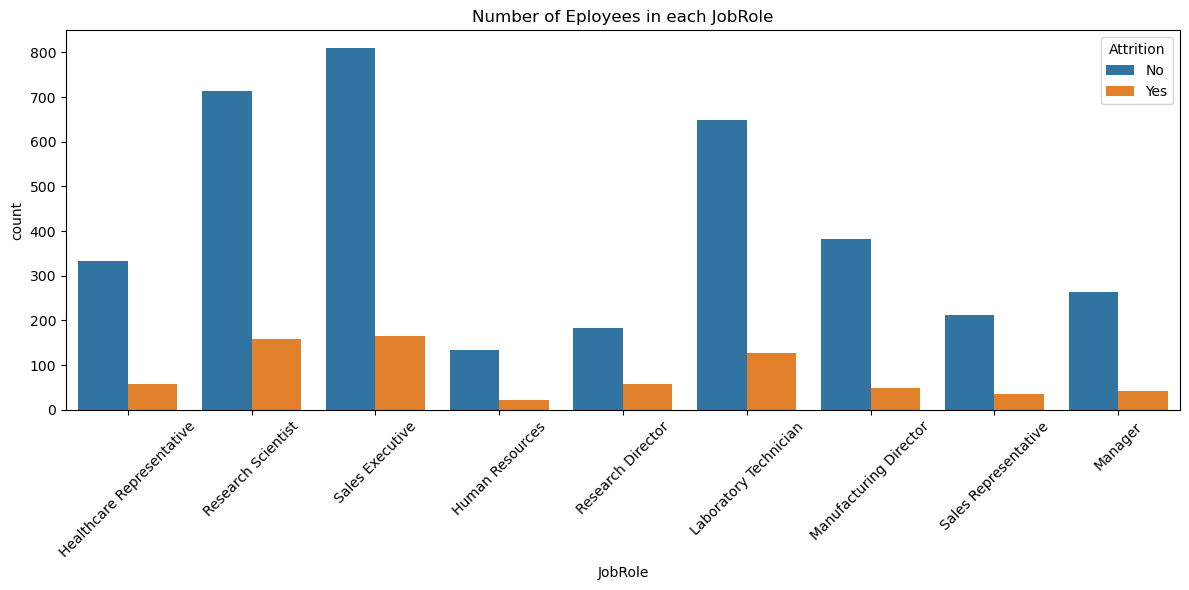

In [37]:
## Number of employees in Different Job roles with Attrition
plt.figure(figsize=(12,6))
job_role = sns.countplot(x='JobRole',data=df, hue='Attrition')
plt.title('Number of Eployees in each JobRole')
plt.xticks(rotation=45)
plt.tight_layout();

## Observations:
* Highest Attrition is in `Sales Executive` followed by `Research Scientist`.
* But the highest rate of Attrition is in `Research Director`.

In [38]:
## checking the attritions based on monthly_income
## Total number of Employees in each Job Role
income_crosstab = pd.crosstab(df['MonthlyIncome'], df['Attrition'])
income_crosstab

Attrition,No,Yes
MonthlyIncome,,
"10,090-49,999",1860,375
"50,000-99,999",1095,218
"100,000-149,999",387,57
"150,000+",338,60


In [39]:
# Calculating the Attrition rate for monthly_income
income_attrition_count = df.groupby('MonthlyIncome')['Attrition'].value_counts().unstack()

# Calculate the percentage of attrition as 'Yes' 
income_attrition_percentage = (income_attrition_count['Yes'] / income_attrition_count.sum(axis=1)) * 100

# Combine count and percentage into a DataFrame
income_attrition_summary = pd.DataFrame({'Attrition Percentage': income_attrition_percentage})

income_attrition_summary

,Attrition Percentage
MonthlyIncome,
"10,090-49,999",16.778523
"50,000-99,999",16.603199
"100,000-149,999",12.837838
"150,000+",15.075377
